In [ ]:
import numpy as np
from view_sampler import ViewSampler, CameraConfig
from manipulated_object import ObjectPosition
import loss_funcs
from evaluate import eval_funcs
from algs import *

from utils.orient import OrientUtils
from evaluate.evaluator import Evaluator
from utils.visualize import SearchPlotter
from utils.image import ImageUtils

import mealpy
import cv2 as cv

plotter = SearchPlotter(update_freq=100)

# Create a camera configuration
cam_config = CameraConfig(location=(0, 0, 0.1), rotation=(np.pi / 2, 0, 0), fov=60)
world_viewer = ViewSampler("data/mug/world.xml", cam_config, simulation_time=5)
sim_viewer = ViewSampler("data/mug/world_sim.xml", cam_config)

loss_func = loss_funcs.IOU()

alg = UniformSampling(sim_viewer, loss_func=loss_func)
alg_config = UniformSampling.Config(time_limit=200, min_samples=350)

eval_func=eval_funcs.XorDiff(0.1)
evaluator = Evaluator(world_viewer, eval_func=eval_func)

init_location = (0, 1.3, 0.3)
random_orientations = OrientUtils.generate_random(80)
eval_positions = [ObjectPosition(orient, init_location) for orient in random_orientations]

for pos in eval_positions:
    orig_img, new_pos = world_viewer.get_view_cropped(pos)
    orient, loss = alg.solve(orig_img, new_pos.location, alg_config)
    pred_img, _ = world_viewer.get_view_cropped(ObjectPosition(orient, new_pos.location))

    cv.imshow("Original", orig_img)
    cv.waitKey(0)
    cv.imshow("Predicted", pred_img)
    cv.waitKey(0)

    orig_depth, _ = world_viewer.get_view_cropped(new_pos, depth=True, allow_simulation=False)
    pred_depth, _ = world_viewer.get_view_cropped(ObjectPosition(orient, new_pos.location), depth=True, allow_simulation=False)

    eval_loss = eval_func(orig_depth, pred_depth)
    print(eval_loss)

for alg, config in [(alg, alg_config)]:
    eval_losses = evaluator.evaluate(alg, config, eval_positions)
    print(f"{type(alg).__name__}: {eval_losses}")


In [ ]:
import numpy as np
from view_sampler import ViewSampler, CameraConfig
from manipulated_object import ObjectPosition
import loss_funcs
from evaluate import eval_funcs
from algs import *

from utils.orient import OrientUtils
from evaluate.evaluator import Evaluator
# from utils.visualize import SearchPlotter
from utils.image import ImageUtils

import mealpy
import cv2 as cv

# plotter = SearchPlotter(update_freq=100, alpha=[0.985])

# Create a camera configuration
cam_config = CameraConfig(location=(0, 0, 0.3), rotation=(np.pi / 2, 0, 0), fov=60)
world_viewer = ViewSampler("data/hammer/world.xml", cam_config, simulation_time=5)
sim_viewer = ViewSampler("data/hammer/world_sim.xml", cam_config)

loss_func = loss_funcs.IOU()
alg_config = MealAlgorithm.Config(time_limit=15, silent=True)

eval_func=eval_funcs.XorDiff(0.1)

evaluator = Evaluator(world_viewer, eval_func=eval_func)
# evaluator.register_callback(lambda x: plotter.reset())

init_location = (0, 1.3, 0.3)
random_orientations = OrientUtils.generate_uniform(3)
eval_positions = [ObjectPosition(orient, init_location) for orient in random_orientations]

algorithms: list[MealAlgorithm] = [
    MealAlgorithm(sim_viewer, loss_func, mealpy.physics_based.SA.OriginalSA(temp_init=10 * 2 * np.pi, step_size=0.1)),
    MealAlgorithm(sim_viewer, loss_func, mealpy.physics_based.SA.SwarmSA(temp_init=10 * 2 * np.pi, step_size=np.pi/100)),
    MealAlgorithm(sim_viewer, loss_func, mealpy.swarm_based.PSO.OriginalPSO()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.swarm_based.PSO.AIW_PSO()),
]
# meal_alg = mealpy.human_based.BRO.DevBRO()
# meal_alg = mealpy.math_based.CEM.OriginalCEM()
# meal_alg = mealpy.music_based.HS.DevHS(pop_size=10)
# meal_alg = mealpy.swarm_based.PSO.OriginalPSO()
# meal_alg = mealpy.physics_based.SA.OriginalSA(pop_size=10, temp_init=10 * 2 * np.pi, step_size=0.2)
# meal_alg = mealpy.human_based.ICA.OriginalICA(empire_count=7, revolution_rate=0.4) # best!!
# meal_alg = mealpy.bio_based.BBO.DevBBO() # potentially good!
meal_alg = mealpy.bio_based.TSA.OriginalTSA() # potentially good!

algorithms: list[MealAlgorithm] = [
    MealAlgorithm(sim_viewer, loss_func, meal_alg),
]

# evaluator.enable_logging("Ealuations/UniformDet/Mug/IOU/")
for alg in algorithms:
    # alg.register_callback(plotter.add_data)
    eval_losses = evaluator.evaluate(alg, alg_config, eval_positions)
    print(f"{alg.get_name()}: {eval_losses}")

world_viewer.close()
sim_viewer.close()
# plotter.close()

In [ ]:
import loss_funcs
from algs import *

import mealpy
from multiprocessing import Process
import evaluation_process as ev

loss_func = loss_funcs.IOU()
alg_config = MealAlgorithm.Config(time_limit=15, silent=True)
root_path = "Ealuations/OverNight/UniformDet/Hammer/IOU/"

if __name__ == '__main__':
    for idx, (alg_name, meal_alg) in enumerate(mealpy.get_all_optimizers().items()):
        if "DevSARO" not in alg_name:
            continue
        print(f"===================== Epoch {idx} =====================")
        print(f"Starting Evaluation of: {alg_name}")
        p = Process(target=ev.evaluate, args=(meal_alg,alg_config,loss_func,root_path))
        p.start()
        p.join()


In [ ]:
import numpy as np
from utils.orient import OrientUtils
len(OrientUtils.generate_uniform(9))

# Analisys

## Plotting Results

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from evaluate.eval_log import EvalLog
from mealpy.utils.history import History
from utils.file import LogFiles
import numpy as np

path = "AllOptimizers/"


directories = LogFiles(path, scan_dirs=True)


In [ ]:
import shutil
# shutil.make_archive("optimizers2",'zip','AllOptimizers2')

### Validate experiment results

In [ ]:
# merge results
path = "AllOptimizers3/"
new_root = "AllOptimizers/"

directories = LogFiles(path, scan_dirs=True)

for directory in directories:
    obj_name = directories.get_filename()
    files = LogFiles(directory)
    dst_folder = new_root + obj_name
    print(dst_folder)
    for file in files:
        files.copy(dst_folder)

In [85]:
# check if all optimizers were run
import mealpy
import config 
from itertools import product

directories = LogFiles("AlgTuning2/Eval3", scan_dirs=True)
all_optimizers = [alg_name for alg_name in mealpy.get_all_optimizers().keys()]
# optimizers = ["OriginalHC", "OriginalICA", "SwarmSA"] # Eval1
# optimizers = ['OriginalFFA','OriginalPSO', 'OriginalDE']# Eval2
optimizers = ['ImprovedSFO','OriginalWCA','BaseGA'] # Eval3
optimizers = ['ImprovedSFO'] # Eval3
count = {}
for directory in directories:
    eval_files = LogFiles(directory, return_full_path=False)
    object_dir = directories.get_filename()
    count[directory] = len(eval_files)
    
    for optimizer in optimizers:
        #check if optimizer run at all
        if optimizer not in eval_files:
            print(f"{optimizer} not run in {directory}")
            continue
        # get all configs to run
        configs = []
        for alg_config in product(*config.ALGORITHM_PARAMS[optimizer].values()):
            keys = config.ALGORITHM_PARAMS[optimizer].keys()
            alg_config = dict(zip(keys, alg_config))
            configs.append(alg_config)
        print(f"LOG::{optimizer}::Num of configs to run = {len(configs)}")
        # check if all configs of optimizer were tested
        for alg_config in configs:
            tested = False
            for file in eval_files:
                if optimizer not in file:
                    continue
                log = eval_files._load()
                if alg_config.items() <= log.alg_params.items():
                    tested = True
                    break
            if not tested:
                print(f"   - ERROR::{directory}/{optimizer} config not tested: {alg_config}")
                

        
print(count)

LOG::ImprovedSFO::Num of configs to run = 4
LOG::ImprovedSFO::Num of configs to run = 4
LOG::ImprovedSFO::Num of configs to run = 4
LOG::ImprovedSFO::Num of configs to run = 4
LOG::ImprovedSFO::Num of configs to run = 4
LOG::ImprovedSFO::Num of configs to run = 4
LOG::ImprovedSFO::Num of configs to run = 4
LOG::ImprovedSFO::Num of configs to run = 4
LOG::ImprovedSFO::Num of configs to run = 4
{'AlgTuning2/Eval3/android': 4, 'AlgTuning2/Eval3/dino': 4, 'AlgTuning2/Eval3/hammer': 4, 'AlgTuning2/Eval3/mug': 4, 'AlgTuning2/Eval3/nescafe': 4, 'AlgTuning2/Eval3/screwdriver': 4, 'AlgTuning2/Eval3/shoe': 4, 'AlgTuning2/Eval3/sofa': 4, 'AlgTuning2/Eval3/stack_rings': 4}


In [ ]:
#test

# count = {}
# for directory in directories:
#     eval_files = LogFiles(directory, return_full_path=False)
#     object_dir = directories.get_filename()
#     directory3 = "AllOptimizers3/"+object_dir
#     eval3_files = LogFiles(directory3, return_full_path=False)
#     count[directory] = len(eval_files)
#     count[directory3] = len(eval3_files)
    
#     eval_file_list = [f.split('_')[0] for f in eval_files]
#     for filename3 in eval3_files:
#         found = False

#         algname3 = filename3.split('_')[0]
#         # print(algname3)
#         for filename in eval_files:
#              algname = filename.split('_')[0]
#              if algname == algname3:
#                  found = True
#                  print(f"{algname} was found in both folders of {object_dir}!!!")
#                  break
        # if not found:
            # print(f"{algname3} not found, is found at {eval3_files.get_path()}")

## load data

In [86]:
path = "AlgTuning2/Eval3/"

directories = LogFiles(path, scan_dirs=True)

In [87]:
raw_data = []
stat_data = []
count = {}

for directory in directories:
    files = LogFiles(directory, return_full_path=False)
    count[directory] = len(files)
    for filename in files:
        pass
        df = files.to_dataframe(add_params=True)
        df = df.assign(object=directories.get_filename())
        raw_data.append(df)

        stat_df = files.eval_stats_dataframe(True)
        stat_df = stat_df.assign(object=directories.get_filename())
        stat_data.append(stat_df)
        


dataframe = pd.concat(raw_data, axis=0, ignore_index=True)
statsframe = pd.concat(stat_data, axis=0, ignore_index=True)

In [88]:
statsframe.columns

Index(['alg', 'mean', 'median', 'std', 'min_val', 'max_val', 'params',
       'object'],
      dtype='object')

In [89]:
# statsframe.sort_values(by=['object','median'], inplace=True)
statsframe.head(10)

,alg,mean,median,std,min_val,max_val,params,object
0,ImprovedSFO,0.168913,0.146270,0.082069,0.055334,0.379724,"{'epoch': 10000, 'pop_size': 100, 'pp': 0.05}",android
1,ImprovedSFO,0.168913,0.146270,0.082069,0.055334,0.379724,"{'epoch': 10000, 'pop_size': 100, 'pp': 0.1}",android
2,ImprovedSFO,0.168913,0.146270,0.082069,0.055334,0.379724,"{'epoch': 10000, 'pop_size': 100, 'pp': 0.2}",android
3,ImprovedSFO,0.168913,0.146270,0.082069,0.055334,0.379724,"{'epoch': 10000, 'pop_size': 100, 'pp': 0.5}",android
4,ImprovedSFO,0.383591,0.395371,0.158416,0.030627,0.803639,"{'epoch': 10000, 'pop_size': 100, 'pp': 0.2}",dino
5,ImprovedSFO,0.383591,0.395371,0.158416,0.030627,0.803639,"{'epoch': 10000, 'pop_size': 100, 'pp': 0.1}",dino
6,ImprovedSFO,0.383591,0.395371,0.158416,0.030627,0.803639,"{'epoch': 10000, 'pop_size': 100, 'pp': 0.05}",dino
7,ImprovedSFO,0.383591,0.395371,0.158416,0.030627,0.803639,"{'epoch': 10000, 'pop_size': 100, 'pp': 0.5}",dino
8,ImprovedSFO,0.300335,0.237616,0.167298,0.078241,0.823556,"{'epoch': 10000, 'pop_size': 100, 'pp': 0.1}",hammer
9,ImprovedSFO,0.300335,0.237616,0.167298,0.078241,0.823556,"{'epoch': 10000, 'pop_size': 100, 'pp': 0.2}",hammer


In [91]:
statsframe.groupby(by=["alg","params"]).describe()[["median"]]

median            \
                                                           count      mean   
alg         params                                                           
ImprovedSFO {'epoch': 10000, 'pop_size': 100, 'pp': 0.05}    9.0  0.201192   
            {'epoch': 10000, 'pop_size': 100, 'pp': 0.1}     9.0  0.201192   
            {'epoch': 10000, 'pop_size': 100, 'pp': 0.2}     9.0  0.201192   
            {'epoch': 10000, 'pop_size': 100, 'pp': 0.5}     9.0  0.201192   

                                                                               \
                                                                std       min   
alg         params                                                              
ImprovedSFO {'epoch': 10000, 'pop_size': 100, 'pp': 0.05}  0.120519  0.069087   
            {'epoch': 10000, 'pop_size': 100, 'pp': 0.1}   0.120519  0.069087   
            {'epoch': 10000, 'pop_size': 100, 'pp': 0.2}   0.120519  0.069087   
            {'epoch': 10000, 'pop_size': 100, 'pp': 0.5}   0.120519  0.069087   

                                                                               \
                                                                25%       50%   
alg         params                                                              
ImprovedSFO {'epoch': 10000, 'pop_size': 100, 'pp': 0.05}  0.127309  0.163692   
            {'epoch': 10000, 'pop_size': 100, 'pp': 0.1}   0.127309  0.163692   
            {'epoch': 10000, 'pop_size': 100, 'pp': 0.2}   0.127309  0.163692   
            {'epoch': 10000, 'pop_size': 100, 'pp': 0.5}   0.127309  0.163692   

                                                                               
                                                                75%       max  
alg         params                                                             
ImprovedSFO {'epoch': 10000, 'pop_size': 100, 'pp': 0.05}  0.237616  0.395371  
            {'epoch': 10000, 'pop_size': 100, 'pp': 0.1}   0.237616  0.395371  
            {'epoch': 10000, 'pop_size': 100, 'pp': 0.2}   0.237616  0.395371  
            {'epoch': 10000, 'pop_size': 100, 'pp': 0.5}   0.237616  0.395371

### plot

In [24]:
import matplotlib
matplotlib.rcParams.update({'font.size':8})

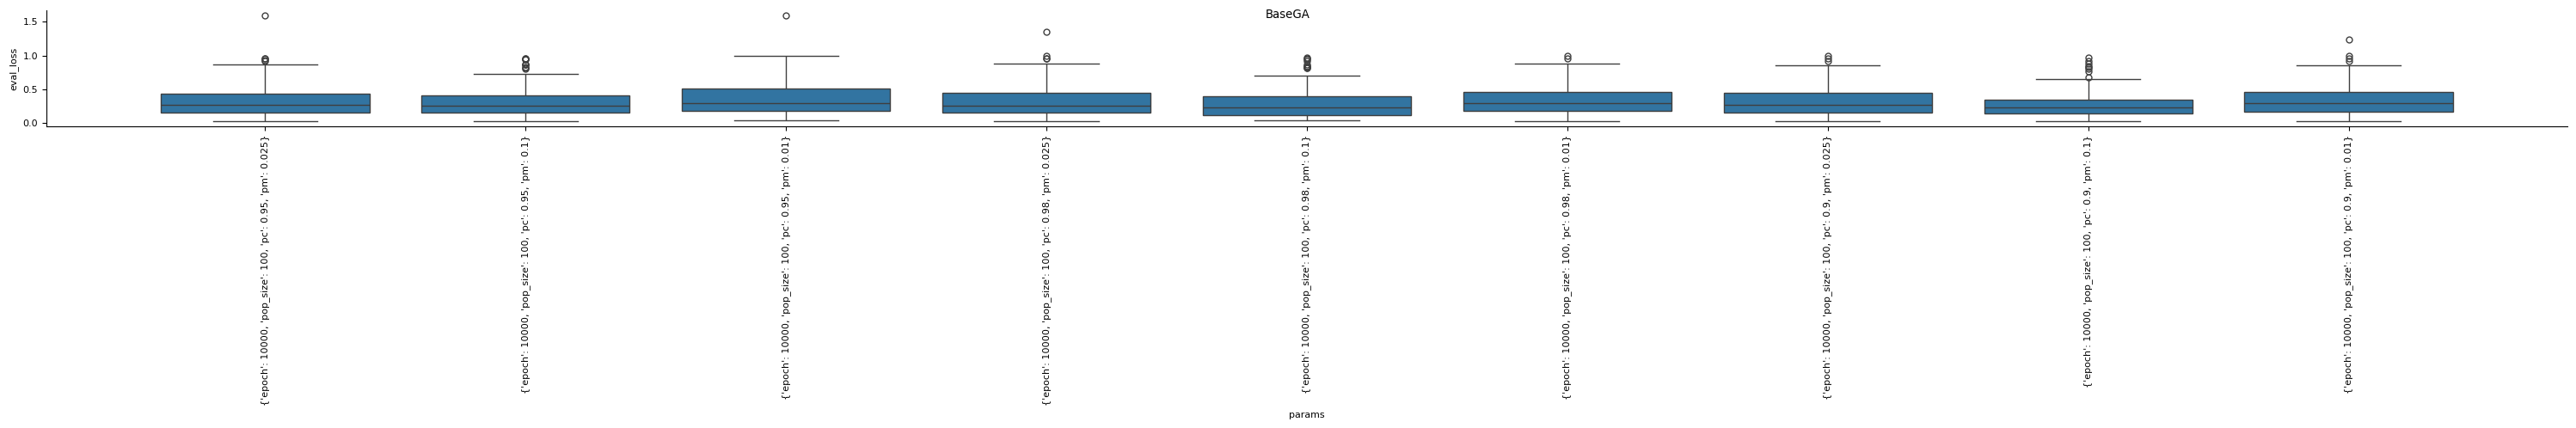

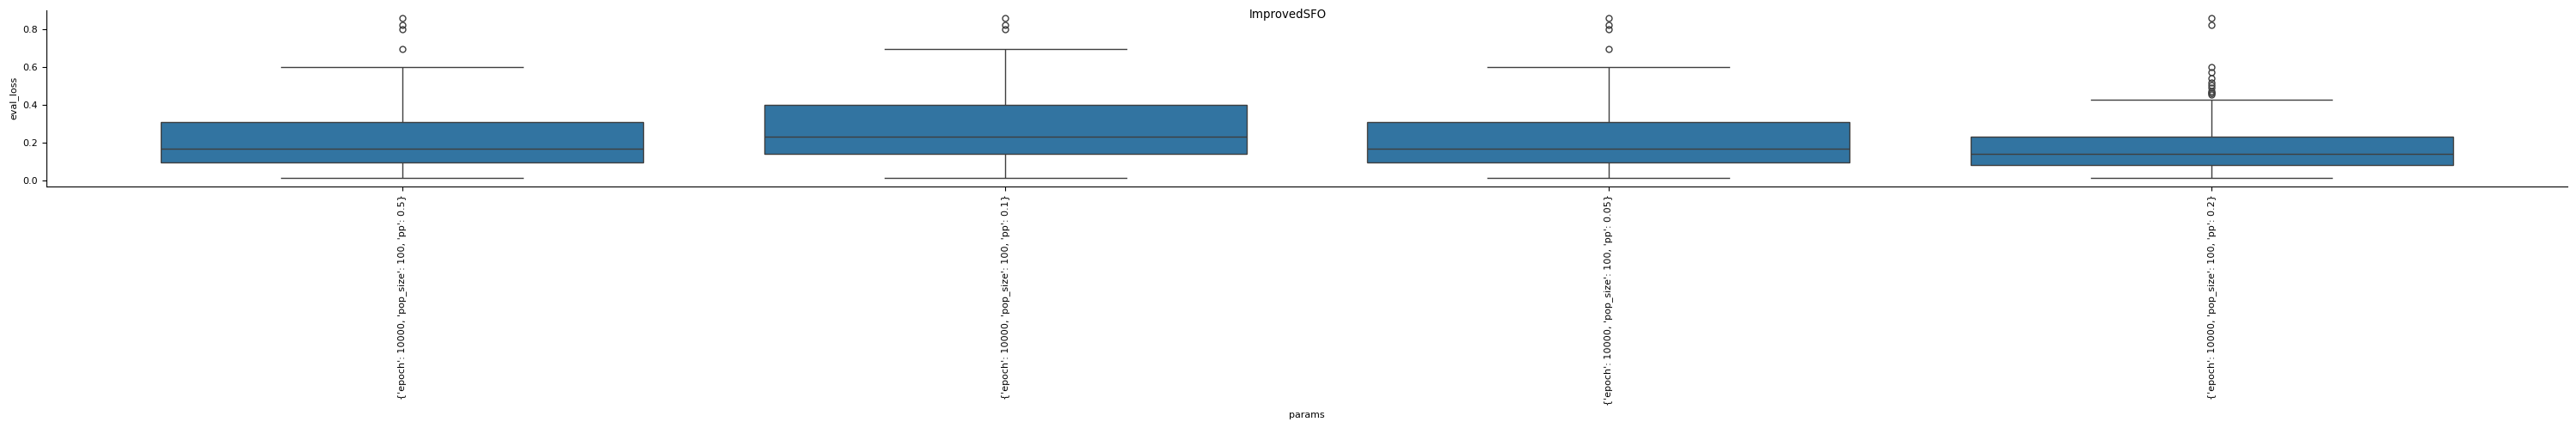

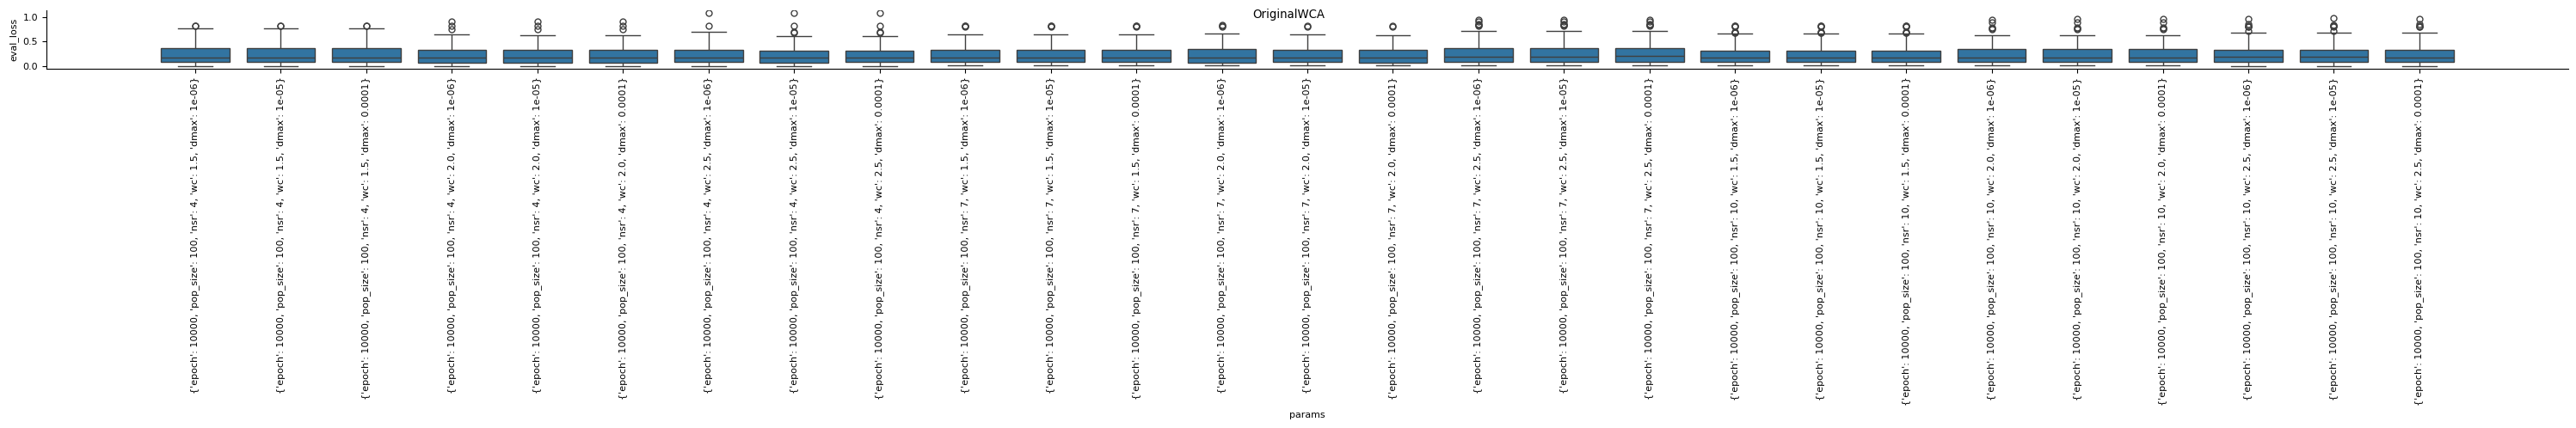

In [84]:
# plot tuning
algs = statsframe['alg'].unique().tolist()

for alg in algs:
    # df_mask = dataframe['object'] == object
    # sf_mask = statsframe['object'] == object
    df = dataframe.groupby(by=["alg"]).get_group((alg,))
    # stats = statsframe.groupby(by=["alg","params"]).get_group((alg,)).sort_values(by=['','median'], inplace=True)
    g = sns.catplot(
        data=df,
        x='params',
        y="eval_loss",
        # row="object",
        # hue="alg",
        kind="box",
        errorbar="sd",
        aspect=6,
        legend=False,
        # col_order=statsframe['alg'],
        # order=statsframe[sf_mask]['alg'],
        # hue_order=statsframe['alg'],
        # col_wrap=20,
        sharex=False,
    )

    # g.figure.set_dpi(400)
    for ax in g.axes.tolist():
        ax = ax[0]
        ax.tick_params(axis="x", rotation=90)
        # ax.set_title(f"PSO GridSearch ordered by median eval loss")

        ax.autoscale_view()
        ax.autoscale()
    g.figure.tight_layout()
    g.figure.suptitle(f"{alg}")
    # g.figure.savefig("AllOptimizers/all_algs.jpg")


In [ ]:
objects = statsframe['object'].unique().tolist()

for object in objects:
    df_mask = dataframe['object'] == object
    sf_mask = statsframe['object'] == object

    g = sns.catplot(
        data=dataframe[df_mask],
        x='alg',
        y="eval_loss",
        row="object",
        hue="alg",
        kind="box",
        errorbar="sd",
        aspect=6,
        legend=False,
        # col_order=statsframe['alg'],
        order=statsframe[sf_mask]['alg'],
        # hue_order=statsframe['alg'],
        # col_wrap=20,
        sharex=False,
    )

    # g.figure.set_dpi(400)
    for ax in g.axes.tolist():
        ax = ax[0]
        ax.tick_params(axis="x", rotation=90)
        # ax.set_title(f"PSO GridSearch ordered by median eval loss")

        ax.autoscale_view()
        ax.autoscale()
    g.figure.tight_layout()
    # g.figure.savefig("AllOptimizers/all_algs.jpg")


In [ ]:
# plot raw data

g = sns.catplot(
    data=dataframe,
    x='alg',
    y="eval_loss",
    # row="object",
    hue="object",
    kind="box",
    errorbar="sd",
    aspect=26,
    legend='brief',
    # col_order=statsframe['alg'],
    order=statsframe['alg'],
    # hue_order=statsframe['alg'],
    # col_wrap=20,
    sharex=False,
)

# g.figure.set_dpi(400)
for ax in g.axes.tolist():
    ax = ax[0]
    ax.tick_params(axis="x", rotation=90)
    # ax.set_title(f"PSO GridSearch ordered by median eval loss")

    ax.autoscale_view()
    ax.autoscale()
g.figure.tight_layout()
g.figure.savefig("AllOptimizers/all_algs.jpg")


In [ ]:
algs = statsframe['alg'].unique().tolist()

df_list = []
for alg in algs:   
    mask = statsframe['alg'] == alg
    means_list = statsframe[mask]['median'].tolist()
    median = np.median(means_list)
    mean = np.mean(means_list)
    std = np.std(means_list)
    min_val = np.min(means_list)
    max_val = np.max(means_list)

    data = {
        "alg": [alg],
        "mean": [mean],
        "median": [median],
        "std": [std],
        "min_val": [min_val],
        "max_val": [max_val],
    }
    df_list.append(pd.DataFrame(data))

statsframe_stats = pd.concat(df_list, axis=0, ignore_index=True)

In [ ]:
statsframe_stats.sort_values(by=['mean'], inplace=True)
statsframe_stats.head(20)

In [ ]:
statsframe_stats.head(10)['alg'].tolist()

In [ ]:
# plot raw data

g = sns.catplot(
    data=statsframe,
    x='alg',
    y="mean",
    # row="object",
    hue="alg",
    kind="box",
    errorbar="sd",
    aspect=8,
    legend=False,
    # col_order=statsframe['alg'],
    order=statsframe_stats['alg'],
    hue_order=statsframe_stats['alg'],
    # col_wrap=20,
    sharex=False,
)

# g.figure.set_dpi(400)
for ax in g.axes.tolist():
    ax = ax[0]
    ax.tick_params(axis="x", rotation=90)
    # ax.set_title(f"PSO GridSearch ordered by median eval loss")

    ax.autoscale_view()
    ax.autoscale()

g.figure.suptitle(f"Mean XorDiff loss of All algorithms over all objects; Default parameters")
g.figure.tight_layout()
g.figure.savefig("AllOptimizers/all_algs_mean_median_loss.jpg", dpi=150)



# Detele?

In [ ]:

for idx, file_path in enumerate(statsframe['path'].to_list()):
    root = files.root
    log = MealLog.load(file_path)
    params = log.alg_params
    if params['empire_count'] == 7 and params['revolution_prob'] == 0.4 and params['revolution_rate'] == 0.4:
        print(f"position={idx} - {log.alg_params}")


In [ ]:
from typing import Iterable
import numpy as np
from itertools import product
import cv2 as cv

from view_sampler import *
from algs import *

import loss_funcs
from evaluate import eval_funcs

from evaluate.dataset import Dataset
from evaluate.eval_log import MealLog
from evaluate.evaluator import Evaluator
from evaluate.dataset import Dataset
from utils.visualize import *
from utils.concurrent import TqdmPool, silence_output

from main2 import evaluate

import mealpy


OBJECT_NAMES = ["airplane", "hammer", "mug"]

PARAMS: dict[str, dict[str, list]] = {
    mealpy.swarm_based.PSO.OriginalPSO.__name__: {
        "c1": [1, 2.05, 3],
        "c2": [1, 2.05, 3],
        "w": [0.2, 0.4, 0.8],
    },

    mealpy.human_based.ICA.OriginalICA.__name__: {
        "empire_count": [4, 7, 10],
        "assimilation_coeff": [1.5, 2.5],
        "revolution_prob": np.linspace(0.02, 0.4, 3),
        "revolution_rate": np.linspace(0.05, 0.4, 3),
        "revolution_step_size": np.linspace(0.05, 0.3, 3),
    },
    mealpy.human_based.SARO.OriginalSARO.__name__: {
        "se": [0.3, 0.5, 0.7],
        "mu": [5, 10, 15, 20],
    },

    mealpy.evolutionary_based.DE.OriginalDE.__name__: {"strategy": range(6)},
    mealpy.math_based.PSS.OriginalPSS.__name__: {
        "acceptance_rate": [0.8, 0.9, 0.95],
    },
    mealpy.math_based.HC.OriginalHC.__name__: {"neighbour_size": [50, 200, 700, 950]},
}


OPTIMIZERS = [
    mealpy.swarm_based.PSO.OriginalPSO,
    mealpy.swarm_based.MSA.OriginalMSA,
    mealpy.swarm_based.SCSO.OriginalSCSO,
    mealpy.physics_based.SA.OriginalSA,
    mealpy.physics_based.EVO.OriginalEVO,
    mealpy.physics_based.EFO.DevEFO,
    mealpy.physics_based.EO.ModifiedEO,
    mealpy.human_based.ICA.OriginalICA,
    mealpy.human_based.FBIO.DevFBIO,
    mealpy.human_based.SARO.OriginalSARO,
    mealpy.evolutionary_based.GA.BaseGA,
    mealpy.evolutionary_based.CRO.OCRO,
    mealpy.evolutionary_based.DE.OriginalDE,
    mealpy.math_based.PSS.OriginalPSS,
    mealpy.math_based.SCA.DevSCA,
    mealpy.math_based.HC.OriginalHC,
]


OBJ_LOCATION = (0, 1.3, 0.3)

In [ ]:

exec = TqdmPool(4)

run_config = MealRunConfig(time_limit=15, silent=True, seed=0)

dataset = Dataset.create_random(location=OBJ_LOCATION, num_samples=20, seed=1)

results = []

tasks = []

for optimizer_type in OPTIMIZERS:

    optimizer_params = PARAMS[optimizer_type.__name__]

    for param_config in product(*optimizer_params.values()):
        if len(param_config) == 0:
            continue

        kwargs = {}
        for i, param_name in enumerate(optimizer_params.keys()):
            kwargs[param_name] = param_config[i]

        try:
            optimizer = optimizer_type()
            optimizer.set_parameters(kwargs)

            for obj_name in OBJECT_NAMES:

                task = exec.submit(
                    evaluate,
                    optimizer=optimizer,
                    run_config=run_config,
                    obj_name=obj_name,
                    eval_positions=dataset,
                    log_folder=f"grid_search/{obj_name}",
                )

        except Exception as e:
            print(f"Failed to create optimizer {optimizer_type.__name__} with params {kwargs}")
            print(str(e))

exec.shutdown(wait=True)


In [ ]:
exec.shutdown(wait=True)
